**Loading Libraries**

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(type(X_train))
X_train.shape

<class 'numpy.ndarray'>


(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
print(X_train[0].shape)
print(X_train[0])

(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 2

AxesImage(size=(28, 28))
AxesImage(size=(28, 28))


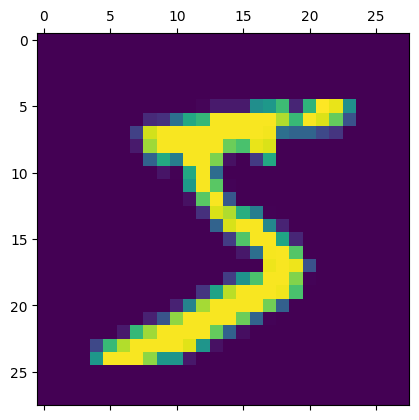

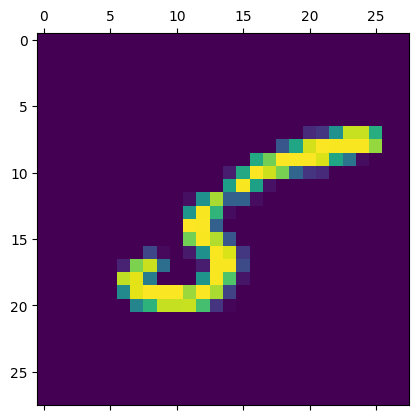

In [6]:
print(plt.matshow(X_train[0]))
print(plt.matshow(X_train[11]))

In [7]:
#manually we are checking the numbers in the dataset
print(y_train[0], y_train[11])
print(y_train[ : 5])

5 5
[5 0 4 1 9]


In [8]:
#Flattening our Training Dataset - Converting the 78 X 78 image to single dimension.
print(X_train.shape)
Flattened_X_train = X_train.reshape(len(X_train), 28*28)#(60000, 28, 28) to (60000, 784) ---> 60000 means total records. 28, 28 means dimensions now we have to change the dimensions.
print(Flattened_X_train.shape)

#Flattening our Testing Dataset - Converting the 78 X 78 image to single dimension.
Flattened_X_test = X_test.reshape(len(X_test), 28*28)
print(Flattened_X_test.shape)

(60000, 28, 28)
(60000, 784)
(10000, 784)


In [9]:
Flattened_X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

**Creating Neural Network**

In [10]:
#Creating a simple Neural Network with 784 input layers (fileds) and 10 output layers (label fields).

#Sequential means i am having stack of layers in my neural network.
Model = keras.Sequential([
    #Dense means all the neurons in one layer connected with every neuron in 2nd layer.
    #keras.layers.Dense(ouput_shape, input_shape, activation_function)

    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

#Compiling our model by optimizing each time.
Model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', #sparse means our output variable y_train. if it is one hot encoded array we will use sparse categorical corssentropy.
    metrics = ['accuracy'] #My goal is to make more accurate my model.
)

Model.fit(Flattened_X_train, y_train, epochs = 18) #Epoch is nothing but iterations that which my nueral network is going through.

Epoch 1/18
1875/1875 [==============================] - 5s 3ms/step - loss: 9.6947 - accuracy: 0.8393
Epoch 2/18
1875/1875 [==============================] - 4s 2ms/step - loss: 6.1496 - accuracy: 0.8789
Epoch 3/18
1875/1875 [==============================] - 6s 3ms/step - loss: 5.8087 - accuracy: 0.8835
Epoch 4/18
1875/1875 [==============================] - 5s 2ms/step - loss: 5.4667 - accuracy: 0.8857
Epoch 5/18
1875/1875 [==============================] - 3s 2ms/step - loss: 5.3869 - accuracy: 0.8874
Epoch 6/18
1875/1875 [==============================] - 3s 1ms/step - loss: 5.4422 - accuracy: 0.8862
Epoch 7/18
1875/1875 [==============================] - 2s 1ms/step - loss: 5.2174 - accuracy: 0.8894
Epoch 8/18
1875/1875 [==============================] - 2s 1ms/step - loss: 5.2751 - accuracy: 0.8886
Epoch 9/18
1875/1875 [==============================] - 2s 1ms/step - loss: 5.1795 - accuracy: 0.8906
Epoch 10/18
1875/1875 [==============================] - 2s 1ms/step - loss: 5.092

In [11]:
#Let's Evaluate our Model on Testing Data. above accuracy evaluation is of the training data.

Model.evaluate(Flattened_X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 5.9291 - accuracy: 0.9024


[5.9291090965271, 0.902400016784668]

In [12]:
#Let's apply the model on Scaled Data. bringing the pixel values to the range between 0 - 1

Flattened_Scaled_X_Train = Flattened_X_train /255
Flattened_Scaled_X_Test = Flattened_X_test /255

In [13]:
print(Flattened_Scaled_X_Train[0].shape)
print(Flattened_Scaled_X_Train[0])

(784,)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.  

In [14]:
#Creating a simple Neural Network with 784 input layers (fileds) and 10 output layers (label fields).

#Sequential means i am having stack of layers in my neural network.
Model = keras.Sequential([
    #Dense means all the neurons in one layer connected with every neuron in 2nd layer.
    #keras.layers.Dense(ouput_shape, input_shape, activation_function)

    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])

#Compiling our model by optimizing each time.
Model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', #sparse means our output variable y_train. if it is one hot encoded array we will use sparse categorical corssentropy.
    metrics = ['accuracy'] #My goal is to make more accurate my model.
)

Model.fit(Flattened_Scaled_X_Train, y_train, epochs = 18) #Epoch is nothing but iterations that which my nueral network is going through.

Epoch 1/18
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4688 - accuracy: 0.8774
Epoch 2/18
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3035 - accuracy: 0.9148
Epoch 3/18
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2837 - accuracy: 0.9206
Epoch 4/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2732 - accuracy: 0.9237
Epoch 5/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2664 - accuracy: 0.9256
Epoch 6/18
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2619 - accuracy: 0.9272
Epoch 7/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2586 - accuracy: 0.9280
Epoch 8/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2554 - accuracy: 0.9292
Epoch 9/18
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2530 - accuracy: 0.9293
Epoch 10/18
1875/1875 [==============================] - 3s 1ms/step - loss: 0.250

*We can see that the Scaled Data improved the accuracy.*

In [15]:
#Let's Evaluate our Model on Testing Data. above accuracy evaluation is of the training data.

Model.evaluate(Flattened_Scaled_X_Test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2668 - accuracy: 0.9263


[0.266805499792099, 0.9262999892234802]

*We can see that accuracy of our model is quite similar to the training data.*

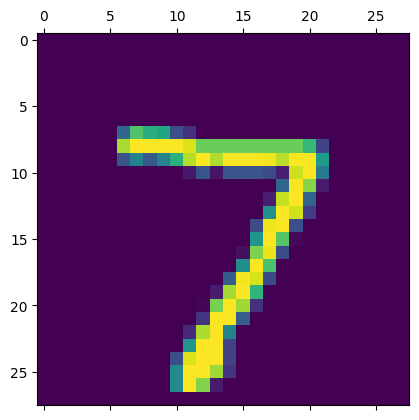

In [16]:
#Let's Predict one single Image.

plt.matshow(X_test[0])

In [17]:
y_pred = Model.predict(Flattened_Scaled_X_Test)
y_pred[0]

313/313 [==============================] - 1s 1ms/step


array([3.7920833e-04, 5.9843691e-10, 1.9430261e-03, 9.7523093e-01,
       1.2367396e-03, 1.4124794e-01, 7.1022371e-10, 9.9990654e-01,
       6.2200900e-02, 6.0607952e-01], dtype=float32)

*we have to find the max score value of the labels.*

In [18]:
#We will use the numpy.argmax for finding max value from the predicted array.

np.argmax(y_pred[0])#It will gives the max value's index in our List.

7

In [19]:
#For Building Confusion matrix, our y_pred values are of scores for every label. now we have to make it like the cell contains of the particular label.

print(y_test[0])
print(y_pred[0])
y_pred_labels = [np.argmax(result) for result in y_pred]
y_pred_labels[0]

7
[3.7920833e-04 5.9843691e-10 1.9430261e-03 9.7523093e-01 1.2367396e-03
 1.4124794e-01 7.1022371e-10 9.9990654e-01 6.2200900e-02 6.0607952e-01]


7

*Hence we can see that the predicted results are converted into Labels.*

**Confusion Matrix**

In [20]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    3,    2,    0,    7,    8,    4,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   5,    8,  936,   15,    8,    3,   12,   10,   32,    3],
       [   2,    0,   13,  939,    1,   22,    3,    9,   15,    6],
       [   1,    1,    6,    3,  919,    0,    9,    8,   10,   25],
       [   8,    3,    2,   42,    9,  775,   15,    8,   28,    2],
       [  11,    3,    8,    1,    7,   15,  910,    1,    2,    0],
       [   1,    6,   22,    6,    5,    1,    0,  956,    2,   29],
       [   6,   13,    6,   32,    8,   27,   11,   13,  849,    9],
       [  11,    8,    1,   14,   28,    7,    0,   28,    5,  907]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

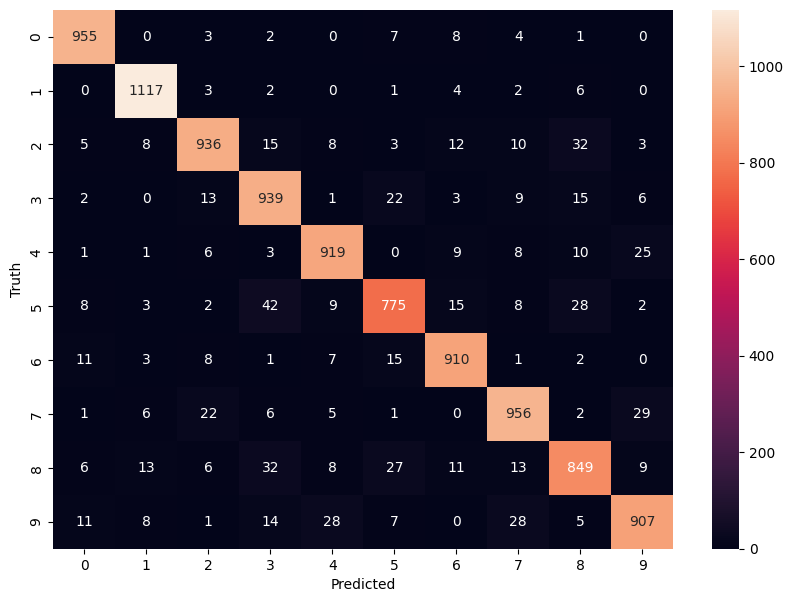

In [21]:
#Visualising the Confusion Matrix

import seaborn as sb
plt.figure(figsize = (10, 7))
sb.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

*Confusion Matrix is a best tool for evaluating our model's predictions. now we only did predictions directly for the input layer now we add hidden layer and let's see the performance of the model.*

**Adding Hidden Layer**

In [29]:
#Creating a simple Neural Network with 784 input layers (fileds) and 10 output layers (label fields).

#Sequential means i am having stack of layers in my neural network.
Model = keras.Sequential([
    #Dense means all the neurons in one layer connected with every neuron in 2nd layer.
    #keras.layers.Dense(HiddenLayer Shape, input_shape, activation_function) - Input Layer (we can add hidden layer shape as our wish because there is no specific numbers, we can do as trail and error)
    #keras.layers.Dense(OutputLayer Shape, activation_function) - Oyput Layer didn't need input shape because it know how figure it out from the whatever connected layer.

    keras.layers.Dense(300, input_shape = (784,), activation = 'relu'),#Let's give the hidden layer size less than the input layer and try.
    keras.layers.Dense(100, activation = 'relu'),#we don't need to specify the input shape again in decalaring layers, because it can able to know from above flattening shape by it's own.
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid'),
])

#Compiling our model by optimizing each time.
Model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy', #sparse means our output variable y_train. if it is one hot encoded array we will use sparse categorical corssentropy.
    metrics = ['accuracy'] #My goal is to make more accurate my model.
)

Model.fit(Flattened_Scaled_X_Train, y_train, epochs = 18) #Epoch is nothing but iterations that which my nueral network is going through.

Epoch 1/18
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2469 - accuracy: 0.9272
Epoch 2/18
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0994 - accuracy: 0.9702
Epoch 3/18
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0701 - accuracy: 0.9779
Epoch 4/18
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0529 - accuracy: 0.9834
Epoch 5/18
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0432 - accuracy: 0.9864
Epoch 6/18
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0346 - accuracy: 0.9892
Epoch 7/18
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0308 - accuracy: 0.9900
Epoch 8/18
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0263 - accuracy: 0.9919
Epoch 9/18
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0243 - accuracy: 0.9926
Epoch 10/18
1875/1875 [==============================] - 7s 4ms/step - loss: 0.020

In [30]:
Model.evaluate(Flattened_Scaled_X_Test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0914 - accuracy: 0.9825


[0.09137933701276779, 0.9825000166893005]

*We can see that there is an improved accuracy from 92% to 98% when adding the hidden layer.*

In [24]:
#Predictions
y_pred = Model.predict(Flattened_Scaled_X_Test)
y_pred[0]

313/313 [==============================] - 1s 2ms/step


array([5.2133683e-11, 9.8551524e-01, 6.4791374e-02, 1.3551281e-01,
       1.2904439e-04, 2.6189748e-06, 3.0855909e-07, 1.0000000e+00,
       5.4212076e-05, 3.1802159e-02], dtype=float32)

In [25]:
#Converting the prediction values to Labels

y_pred_labels = [np.argmax(result) for result in y_pred]
y_pred_labels[0]

7

In [26]:
#Confusion Matrix

cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 975,    0,    0,    0,    0,    1,    2,    1,    1,    0],
       [   0, 1126,    2,    1,    0,    0,    1,    1,    4,    0],
       [   5,    5, 1004,    3,    0,    1,    2,    6,    6,    0],
       [   2,    0,    3,  986,    0,    6,    0,    6,    3,    4],
       [   1,    0,    2,    0,  968,    0,    4,    5,    0,    2],
       [   2,    0,    0,   10,    2,  866,    5,    2,    4,    1],
       [   4,    4,    0,    0,    4,    2,  943,    0,    1,    0],
       [   1,    2,    7,    2,    0,    0,    0, 1011,    3,    2],
       [   8,    1,    3,    3,    2,    4,    1,    3,  942,    7],
       [   2,    2,    0,    4,   18,    6,    0,    9,    0,  968]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

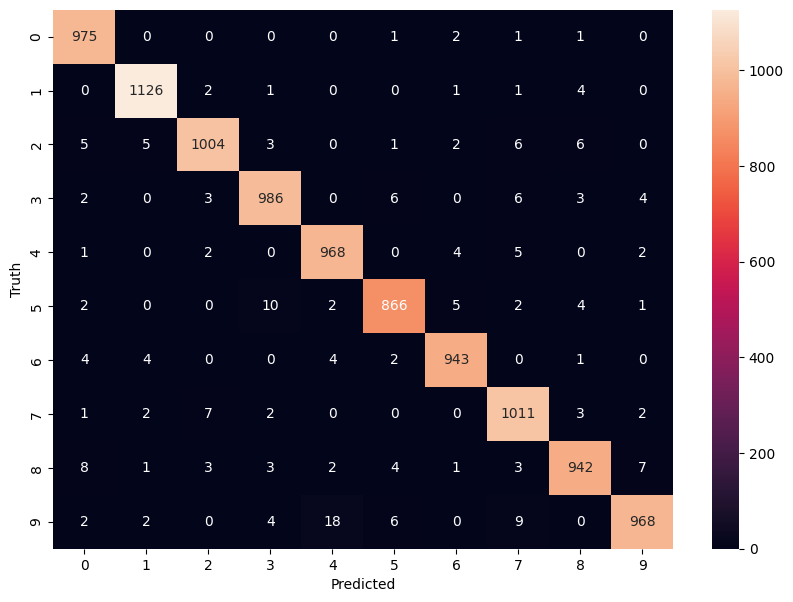

In [27]:
#Visualising

plt.figure(figsize = (10, 7))
sb.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

*The Diagnol Box values are increased. if diagnol box values are big numbers than the other then that is the perfect state that our model is perfectly doing accurate predictions. But every time is not perfect.*